In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def create_dict(logs, name):
    output_dict = {"train_acc": [], "val_acc": [], "val_bleu4": [], "name": name}
    
    runs = len(logs) # number of runs
    # Plot averaged accuracies and blue score:
    log_len = 0
    for log in logs:
        curr_len = len(log['train_acc'])
        if curr_len > log_len:
            log_len = curr_len
    output_dict["max_run_len"] = log_len 

    best_run = -1
    for key in logs[0]:
        # Masked array because runs may have different epoch lengths
        key_data = np.ma.empty((runs, log_len))
        key_data.mask = True
        for run in range(len(logs)):
            data = logs[run][key]
            key_data[run, :len(data)] = np.array(data)

        output_dict[key] = key_data
        
    return output_dict

def plot_runs(list_of_logs):
    
    
    
    
    keys = []
    for log in list_of_logs:
        name = log.pop("name")
        max_run_len = log.pop("max_run_len")
        
        for key in log:
            
            keys.append(key)
            plt.figure(key)
                
            key_data = log[key]

            data_mean = key_data.mean(axis=0)
            data_std = key_data.std(axis=0)
            lower_bound = data_mean - data_std
            upper_bound = data_mean + data_std

            # Plot stuff
            
            p = plt.plot(range(max_run_len), data_mean, label=name)
            color = p[0].get_color()
            plt.fill_between(range(max_run_len), lower_bound, upper_bound, alpha=0.5, color=color)
            
    for key in keys:
        plt.figure(key)
        
        if key == "val_acc":
            name = "Validation Accuracy"
        elif key == "train_acc":
            name = "Train Accuracy"
        elif key == "val_bleu4":
            name = "Bleu4 Score"
        
        plt.legend()
        plt.title(name + " during training time")
        plt.xlabel('Epochs')
        plt.ylabel(name)
        plt.savefig(key + ".pdf")



In [32]:
def get_dict(name):
    with open(name + ".json", "rb") as file:
        logs = pickle.load(file)
    return create_dict(logs, name)

In [33]:
no_doubly = get_dict("no_doubly")
alpha_0 = get_dict("use_doubly_alpha_0")
alpha_1 = get_dict("use_doubly_alpha_1")
alpha_5 = get_dict("use_doubly_alpha_5")
log_list = [no_doubly, alpha_0, alpha_1, alpha_5]

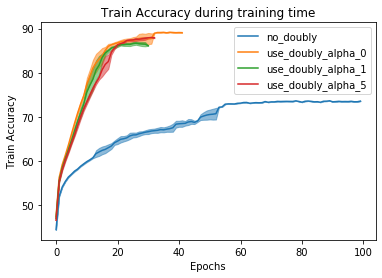

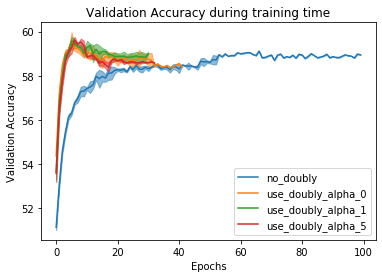

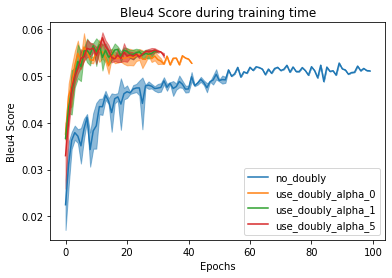

In [34]:
plot_runs(log_list)